In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [13]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


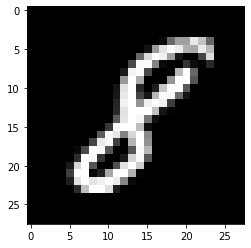

In [15]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='gray')
plt.show()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.
W0105 19:07:50.827379 140366929880896 deprecation_wrapper.py:119] From /home/utkarsh/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0105 19:07:50.843846 140366929880896 deprecation_wrapper.py:119] From /home/utkarsh/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0105 19:07:50.845899 140366929880896 deprecation_wrapper.py:119] From /home/utkarsh/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0105 19:07:50.863345 140366929880896 deprecation_wrapper.py:119] From /home/utkarsh/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10,batch_size = 100)

W0105 19:07:50.939728 140366929880896 deprecation_wrapper.py:119] From /home/utkarsh/.local/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0105 19:07:50.959200 140366929880896 deprecation_wrapper.py:119] From /home/utkarsh/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3622: The name tf.log is deprecated. Please use tf.math.log instead.

W0105 19:07:51.042085 140366929880896 deprecation.py:323] From /home/utkarsh/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.2469 - acc: 0.9275
Epoch 2/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0946 - acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0636 - acc: 0.9807
Epoch 4/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0493 - acc: 0.9843
Epoch 5/10
60000/60000 [==============================] - 16s 266us/step - loss: 0.0402 - acc: 0.9874
Epoch 6/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.0319 - acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0259 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0209 - acc: 0.9935
Epoch 9/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.0199 - acc: 0.9937
Epoch 10/10
60000/60000 [==============================] - 16s 267us/step - loss: 

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 120us/step


[0.04920764156640434, 0.9864]

In [9]:
model.save("model-saved.h5")